In [29]:
%pip install minio pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 229.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.2/86.2 kB 347.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [30]:
from minio import Minio
import pandas as pd

# Timeframe giugno - settembre 2023 

In [97]:
START_DATE = "2023-06-01"
END_DATE = "2023-09-30 23:00"
SPECIFIC_DAY = "2023-06-29"

# Parcheggi 

In [35]:
statistiche_parcheggi_molveno_df = pd.read_parquet("datasets/molveno/statistiche_parcheggi_molveno.parquet")
statistiche_parcheggi_molveno_df["date"] = pd.to_datetime(statistiche_parcheggi_molveno_df["date"])
statistiche_parcheggi_molveno_df

Unnamed: 0,20 MIN,40 MIN,1 ORA,1 ORA E 20 MIN,1 ORA E 40 MIN,2 ORE,3 ORE,4 ORE,5 ORE,6 ORE,...,1 GIORNO,2 GIORNI,3 GIORNI,4 GIORNI,5 GIORNI,6 GIORNI,7 GIORNI,8 GIORNI,TOTALE,date
0,1.0,3.0,3.0,9.0,6.0,4.0,12.0,8.0,7.0,13.0,...,0.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,99.0,2022-07-27
1,1.0,4.0,5.0,4.0,10.0,14.0,35.0,23.0,22.0,21.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,156.0,2022-07-28
2,1.0,2.0,8.0,7.0,10.0,16.0,38.0,21.0,13.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142.0,2022-07-29
3,5.0,15.0,21.0,23.0,35.0,22.0,107.0,83.0,85.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,604.0,2022-07-30
4,8.0,11.0,24.0,39.0,45.0,34.0,123.0,121.0,141.0,140.0,...,3.0,8.0,2.0,1.0,0.0,0.0,0.0,0.0,1056.0,2022-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0.0,2.0,1.0,1.0,0.0,1.0,1.0,3.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2023-09-27
428,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2023-09-28
429,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,2.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,2023-09-29
430,0.0,4.0,2.0,7.0,5.0,4.0,9.0,13.0,6.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,2023-09-30


### Visualize data within the specific timeframe

In [36]:
statistiche_parcheggi_molveno_timeframe_df = statistiche_parcheggi_molveno_df[
    (statistiche_parcheggi_molveno_df["date"] >= START_DATE) & 
    (statistiche_parcheggi_molveno_df["date"] <= END_DATE)
]

<Axes: xlabel='date'>

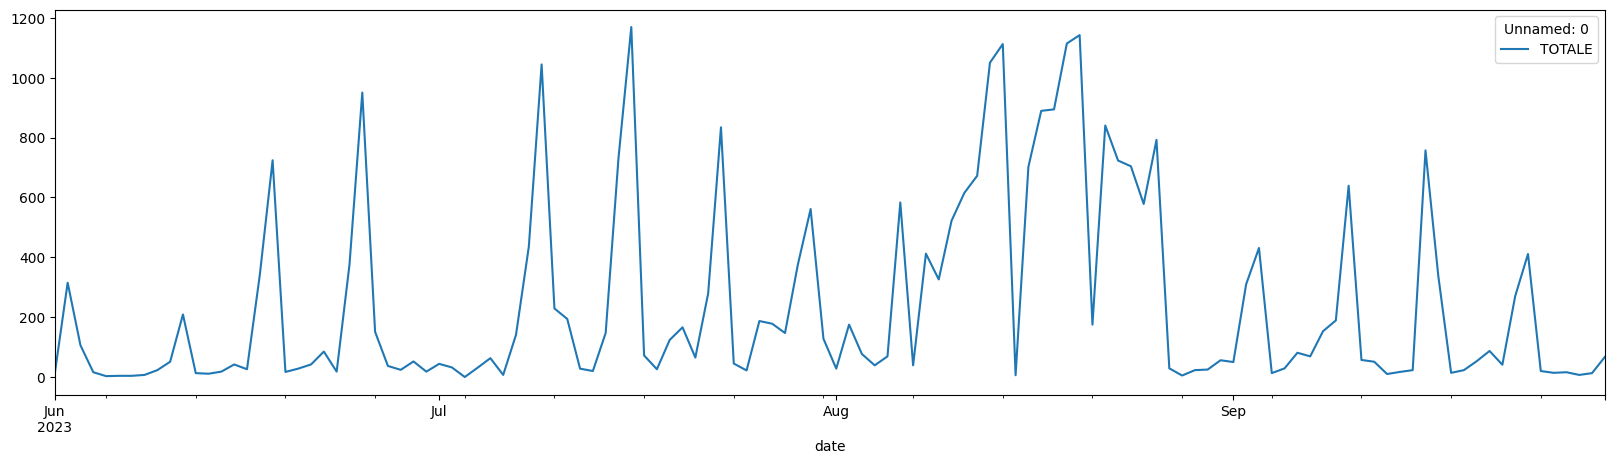

In [37]:
statistiche_parcheggi_molveno_timeframe_df.plot(y=["TOTALE"], x="date", figsize=(20,5))

# Dati Vodafone

## Vodafone Aree

In [38]:
aree_df = pd.read_parquet("datasets/vodafone/vodafone_aree.parquet")
aree_df

,locId,locName,locType,locDescr
0,22,provincia,AL_2,Trentino
1,100,apt,TN_MKT_AM_22,"San Martino Di Castrozza, Primiero e Vanoi"
2,101,apt,TN_MKT_AM_22,Valle di Non
3,102,apt,TN_MKT_AM_22,"Rovereto, Vallagarina e Monte Baldo"
4,103,apt,TN_MKT_AM_22,Valle di Fassa
...,...,...,...,...
148,LAGO_CAPR,poi,TN_MKT_POI,Lago dei Caprioli
149,MADO_CAMP,poi,TN_MKT_POI,Madonna di Campiglio
150,PINZ_REND,poi,TN_MKT_POI,Pinzolo e Rendena
151,STAZ_ROVE,poi,TN_MKT_POI,Stazione di Trento


<Axes: xlabel='locName'>

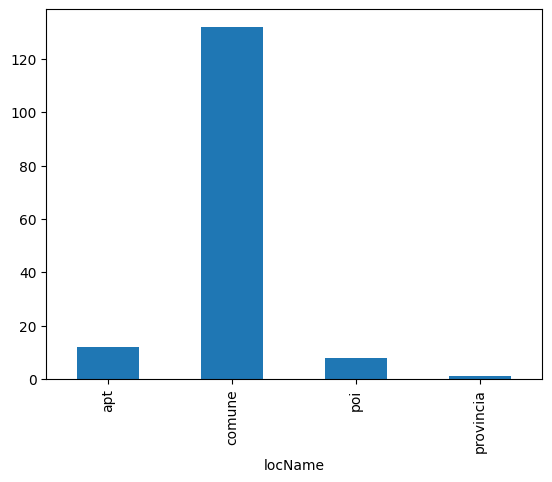

In [39]:
aree_df.groupby("locName")["locId"].count().plot(kind="bar")

## Vodafone Attendances

In [40]:
attendances_df = pd.read_parquet("datasets/vodafone/vodafone_attendences.parquet")
attendances_timeframe_df = attendances_df[
    (attendances_df["date"] >= START_DATE) &
    (attendances_df["date"] <= END_DATE)
]
attendances_timeframe_df

,date,locType,locId,userCountry,userProfile,userCluster,value
190181,2023-06-01,AL_2,22,STR,COMMUTER,STR,437
190182,2023-06-01,AL_2,22,STR,TOURIST,STR,51089
190183,2023-06-01,AL_2,22,STR,VISITOR,STR,26423
190184,2023-06-01,TN_MKT_AL_3,104,STR,TOURIST,STR,0
190185,2023-06-01,TN_MKT_AL_3,104,STR,VISITOR,STR,0
...,...,...,...,...,...,...,...
237191,2023-09-29,TN_MKT_POI,STAZ_ROVE,STR,TOURIST,STR,20
237192,2023-09-29,TN_MKT_POI,STAZ_ROVE,STR,VISITOR,STR,160
237193,2023-09-29,TN_MKT_POI,STAZ_TREN,STR,COMMUTER,STR,0
237194,2023-09-29,TN_MKT_POI,STAZ_TREN,STR,TOURIST,STR,70


In [41]:
attendances_timeframe_df["date"] = pd.to_datetime(attendances_timeframe_df["date"])
attendances_timeframe_df["year"] = attendances_timeframe_df["date"].dt.year
attendances_timeframe_df["month"] = attendances_timeframe_df["date"].dt.month
attendances_timeframe_df["day"] = attendances_timeframe_df["date"].dt.day

/tmp/ipykernel_326/1068112620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attendances_timeframe_df["date"] = pd.to_datetime(attendances_timeframe_df["date"])
/tmp/ipykernel_326/1068112620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attendances_timeframe_df["year"] = attendances_timeframe_df["date"].dt.year
/tmp/ipykernel_326/1068112620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [42]:
attendances_timeframe_df

,date,locType,locId,userCountry,userProfile,userCluster,value,year,month,day
190181,2023-06-01,AL_2,22,STR,COMMUTER,STR,437,2023,6,1
190182,2023-06-01,AL_2,22,STR,TOURIST,STR,51089,2023,6,1
190183,2023-06-01,AL_2,22,STR,VISITOR,STR,26423,2023,6,1
190184,2023-06-01,TN_MKT_AL_3,104,STR,TOURIST,STR,0,2023,6,1
190185,2023-06-01,TN_MKT_AL_3,104,STR,VISITOR,STR,0,2023,6,1
...,...,...,...,...,...,...,...,...,...,...
237191,2023-09-29,TN_MKT_POI,STAZ_ROVE,STR,TOURIST,STR,20,2023,9,29
237192,2023-09-29,TN_MKT_POI,STAZ_ROVE,STR,VISITOR,STR,160,2023,9,29
237193,2023-09-29,TN_MKT_POI,STAZ_TREN,STR,COMMUTER,STR,0,2023,9,29
237194,2023-09-29,TN_MKT_POI,STAZ_TREN,STR,TOURIST,STR,70,2023,9,29


In [43]:
attendances_timeframe_df.groupby(["date"])["value"].sum()

date
2023-06-01    231508
2023-06-02    227768
2023-06-03    261777
2023-06-04    247260
2023-06-05    231779
               ...  
2023-09-25    201140
2023-09-26    215672
2023-09-27    219892
2023-09-28    222399
2023-09-29    239090
Name: value, Length: 121, dtype: int64

In [44]:
test = attendances_timeframe_df.groupby(["date", "userProfile"])["value"].sum()
test

date        userProfile
2023-06-01  COMMUTER         1423
            TOURIST        149029
            VISITOR         81056
2023-06-02  COMMUTER          985
            TOURIST        151732
                            ...  
2023-09-28  TOURIST        150656
            VISITOR         70148
2023-09-29  COMMUTER         1732
            TOURIST        161544
            VISITOR         75814
Name: value, Length: 363, dtype: int64

<Axes: xlabel='date'>

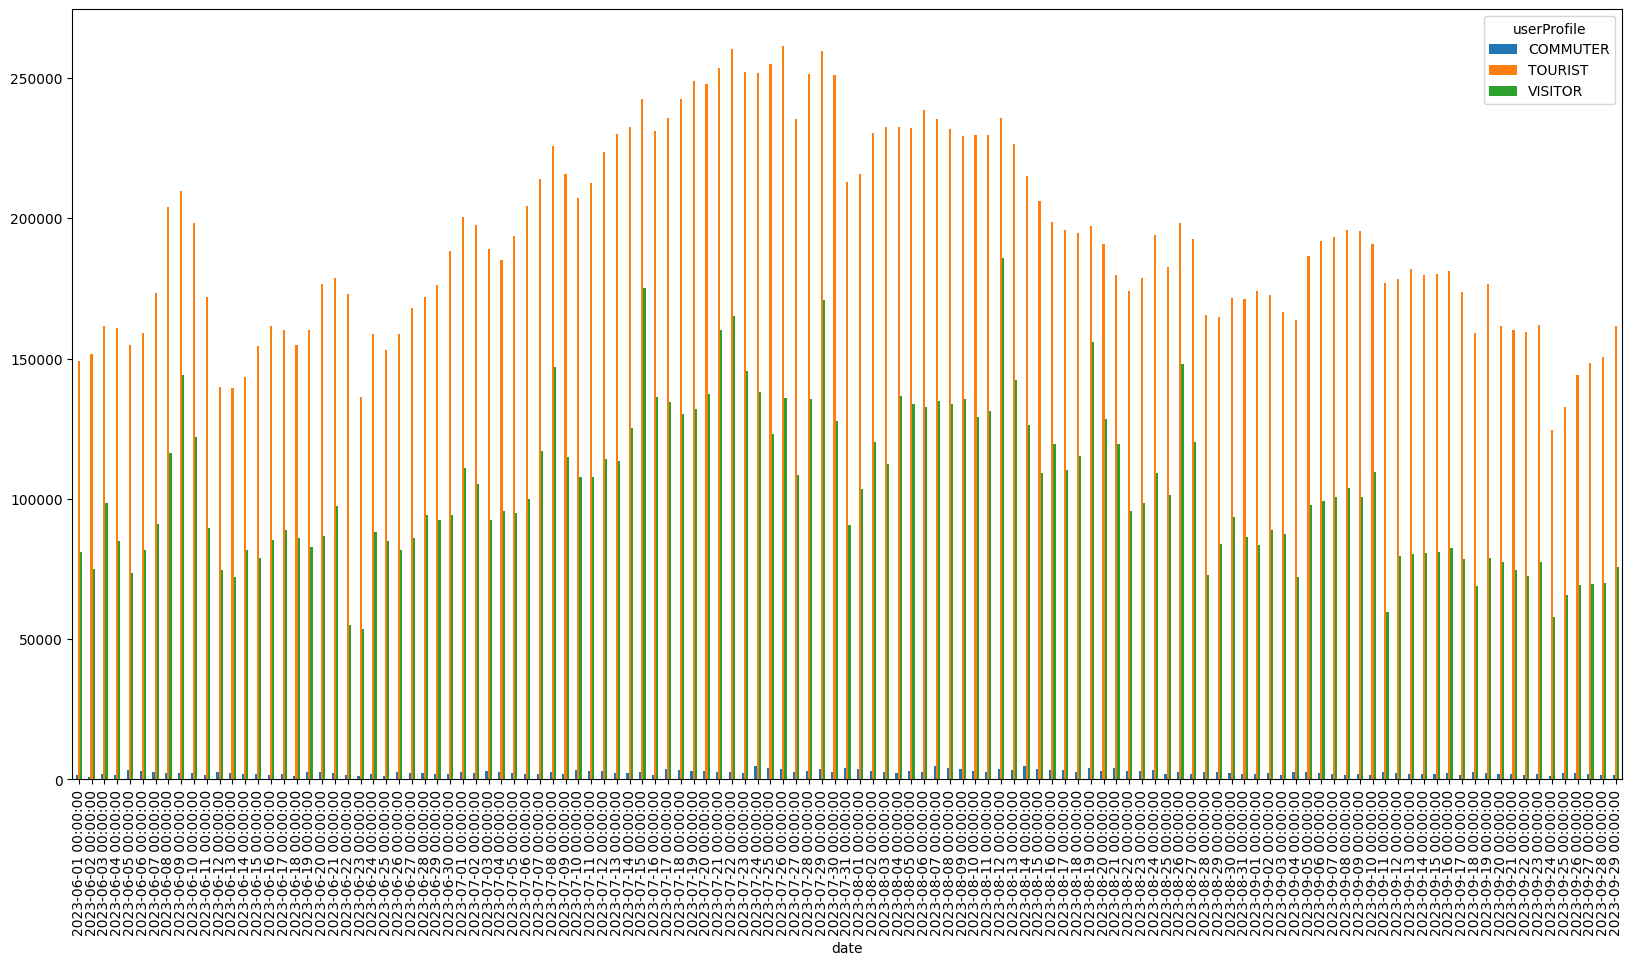

In [45]:
attendances_timeframe_df.groupby(["date", "userProfile"])["value"].sum().unstack().plot.bar(figsize=(20, 10))

## Vodafone Attendances stranieri

In [46]:
attendances_str_df = pd.read_parquet("datasets/vodafone/vodafone_attendences_STR.parquet")
attendances_str_df["date"] = pd.to_datetime(attendances_str_df["date"])
attendances_str_df["year"] = attendances_str_df["date"].dt.year
attendances_str_df["month"] = attendances_str_df["date"].dt.month
attendances_str_df["day"] = attendances_str_df["date"].dt.day
attendances_str_df.dtypes

date           datetime64[ns]
locType                object
locId                  object
userCountry            object
userProfile            object
userCluster            object
value                   int64
year                    int32
month                   int32
day                     int32
dtype: object

In [47]:
attendances_str_timeframe_df = attendances_str_df[
    (attendances_str_df["date"] >= START_DATE) &
    (attendances_str_df["date"] <= END_DATE)
]
attendances_str_timeframe_df

,date,locType,locId,userCountry,userProfile,userCluster,value,year,month,day
190181,2023-06-01,AL_2,22,STR,COMMUTER,STR,437,2023,6,1
190182,2023-06-01,AL_2,22,STR,TOURIST,STR,51089,2023,6,1
190183,2023-06-01,AL_2,22,STR,VISITOR,STR,26423,2023,6,1
190184,2023-06-01,TN_MKT_AL_3,104,STR,TOURIST,STR,0,2023,6,1
190185,2023-06-01,TN_MKT_AL_3,104,STR,VISITOR,STR,0,2023,6,1
...,...,...,...,...,...,...,...,...,...,...
237572,2023-09-30,TN_MKT_POI,STAZ_ROVE,STR,TOURIST,STR,0,2023,9,30
237573,2023-09-30,TN_MKT_POI,STAZ_ROVE,STR,VISITOR,STR,90,2023,9,30
237574,2023-09-30,TN_MKT_POI,STAZ_TREN,STR,COMMUTER,STR,0,2023,9,30
237575,2023-09-30,TN_MKT_POI,STAZ_TREN,STR,TOURIST,STR,69,2023,9,30


In [48]:
attendances_str_timeframe_df[attendances_str_timeframe_df["date"] == "2023-06-01"]

,date,locType,locId,userCountry,userProfile,userCluster,value,year,month,day
190181,2023-06-01,AL_2,22,STR,COMMUTER,STR,437,2023,6,1
190182,2023-06-01,AL_2,22,STR,TOURIST,STR,51089,2023,6,1
190183,2023-06-01,AL_2,22,STR,VISITOR,STR,26423,2023,6,1
190184,2023-06-01,TN_MKT_AL_3,104,STR,TOURIST,STR,0,2023,6,1
190185,2023-06-01,TN_MKT_AL_3,104,STR,VISITOR,STR,0,2023,6,1
...,...,...,...,...,...,...,...,...,...,...
190540,2023-06-01,TN_MKT_POI,STAZ_ROVE,STR,TOURIST,STR,0,2023,6,1
190541,2023-06-01,TN_MKT_POI,STAZ_ROVE,STR,VISITOR,STR,214,2023,6,1
190542,2023-06-01,TN_MKT_POI,STAZ_TREN,STR,COMMUTER,STR,0,2023,6,1
190543,2023-06-01,TN_MKT_POI,STAZ_TREN,STR,TOURIST,STR,61,2023,6,1


<Axes: xlabel='date'>

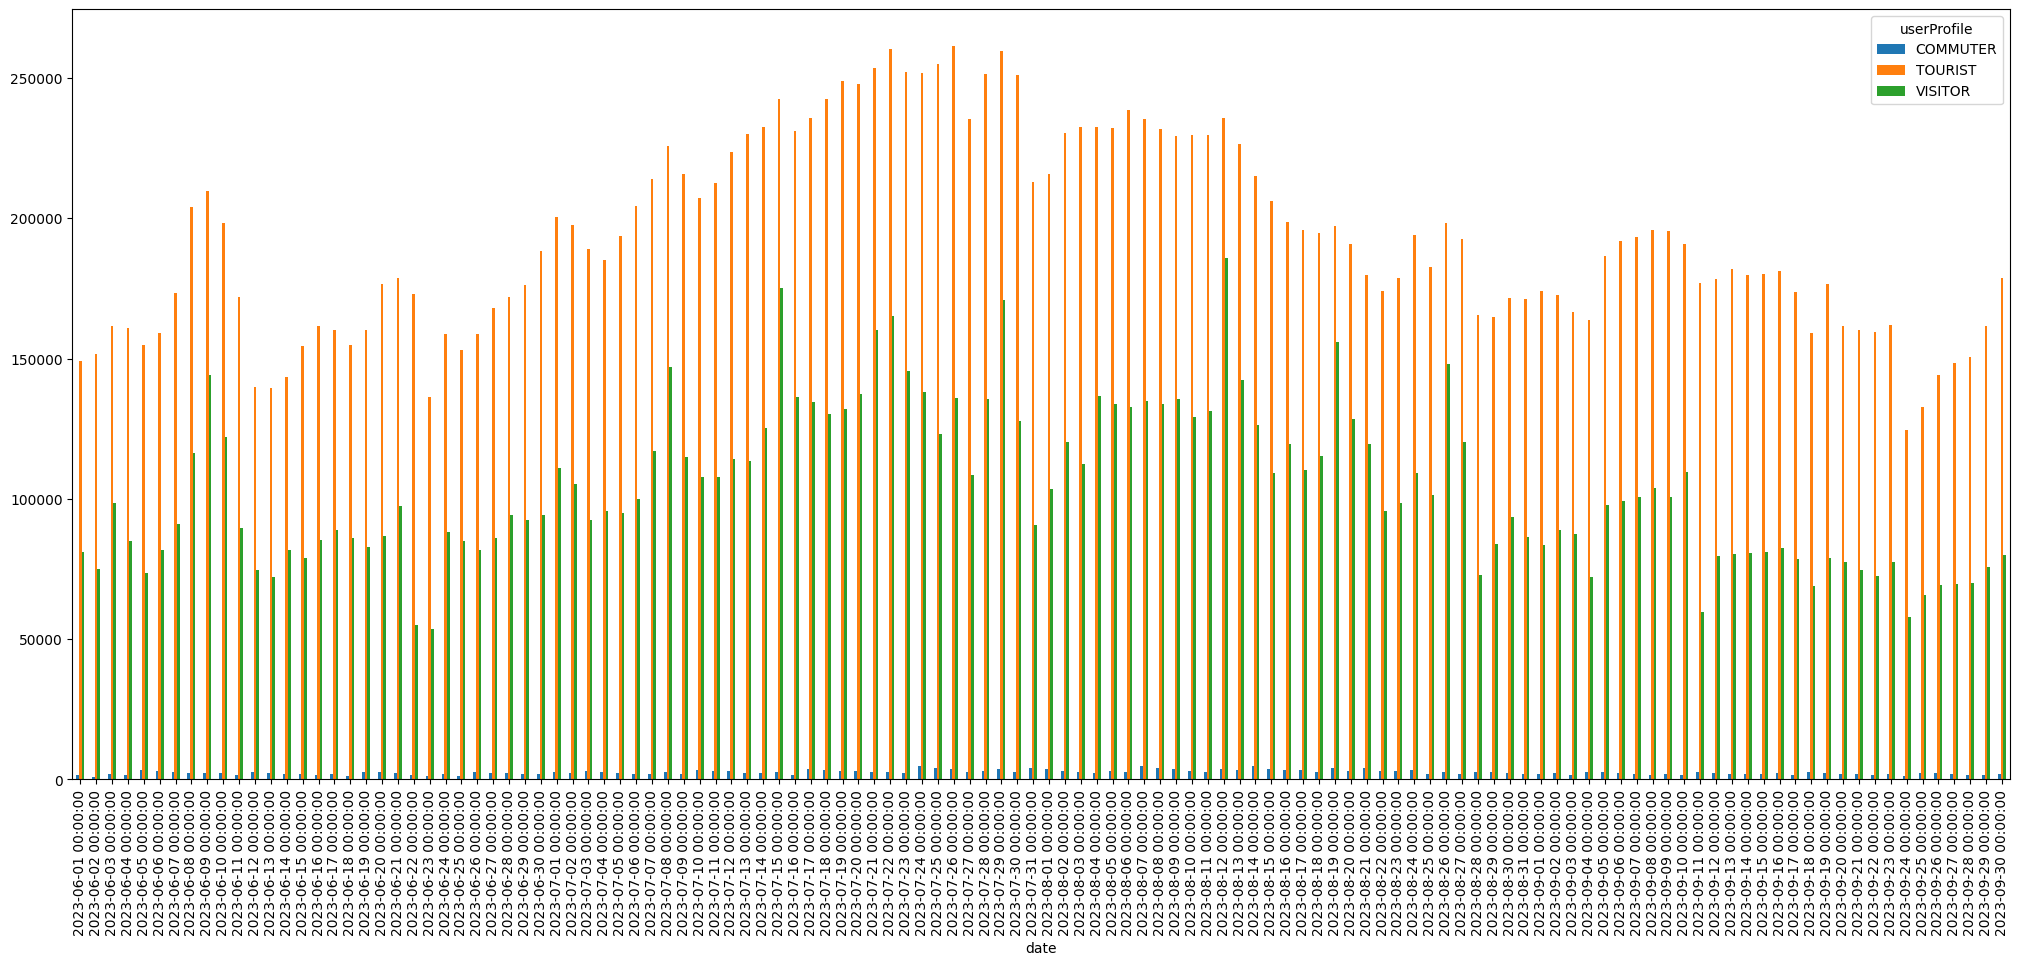

In [49]:
attendances_str_timeframe_df.groupby(["date", "userProfile"])["value"].sum().unstack().plot.bar(figsize=(25, 10))

# Contapersone passaggi

In [50]:
contapersone_passaggi_df = pd.read_parquet("datasets/molveno/contapersone_passaggi.parquet")
contapersone_passaggi_df = contapersone_passaggi_df[
    (contapersone_passaggi_df["data"] >= START_DATE) & 
    (contapersone_passaggi_df["data"] <= END_DATE)
]
contapersone_passaggi_df

,data,varco,presenze
0,2023-07-14,Varco 1,393
1,2023-07-14,Varco 2,91
2,2023-07-14,Varco 3,160
3,2023-07-14,Varco 4,70
4,2023-07-14,Varco 5,82
...,...,...,...
499,2023-09-07,Varco 5,207
500,2023-09-07,Varco 6,90
501,2023-09-07,Varco 7,196
502,2023-09-07,Varco 8,95


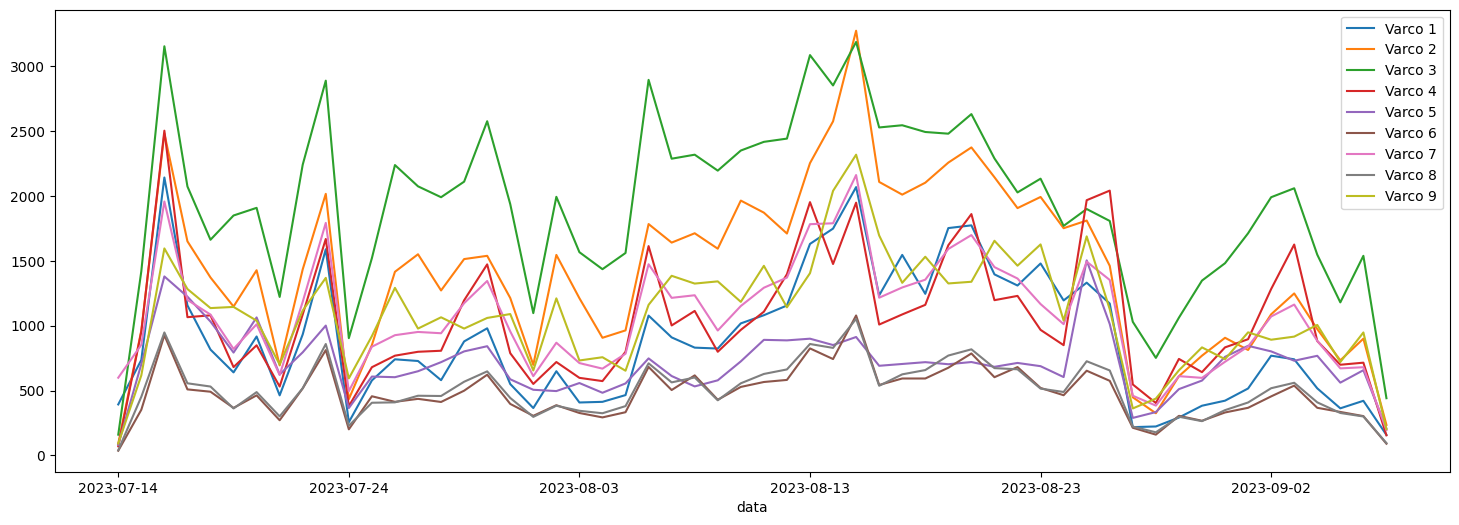

In [51]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18,6))
#contapersone_passaggi_df.set_index("data").groupby("varco").plot( figsize=(15, 5), ax=plt.gca())
g_plot = lambda x:x.plot(x = "data", y = "presenze", ax=ax, label=x.name)
contapersone_passaggi_df.groupby("varco").apply(g_plot)
plt.show()

## Contapersone presenze

In [52]:
contapersone_presenze_df = pd.read_parquet("datasets/molveno/contapersone_presenze.parquet")
contapersone_presenze_df

,data,varco,presenze
0,2023-07-15,Varco 1,183
1,2023-07-15,Varco 2,204
2,2023-07-15,Varco 3,304
3,2023-07-15,Varco 4,199
4,2023-07-15,Varco 5,117
...,...,...,...
625,2023-09-22,Varco 5,127
626,2023-09-22,Varco 6,77
627,2023-09-22,Varco 7,199
628,2023-09-22,Varco 8,73


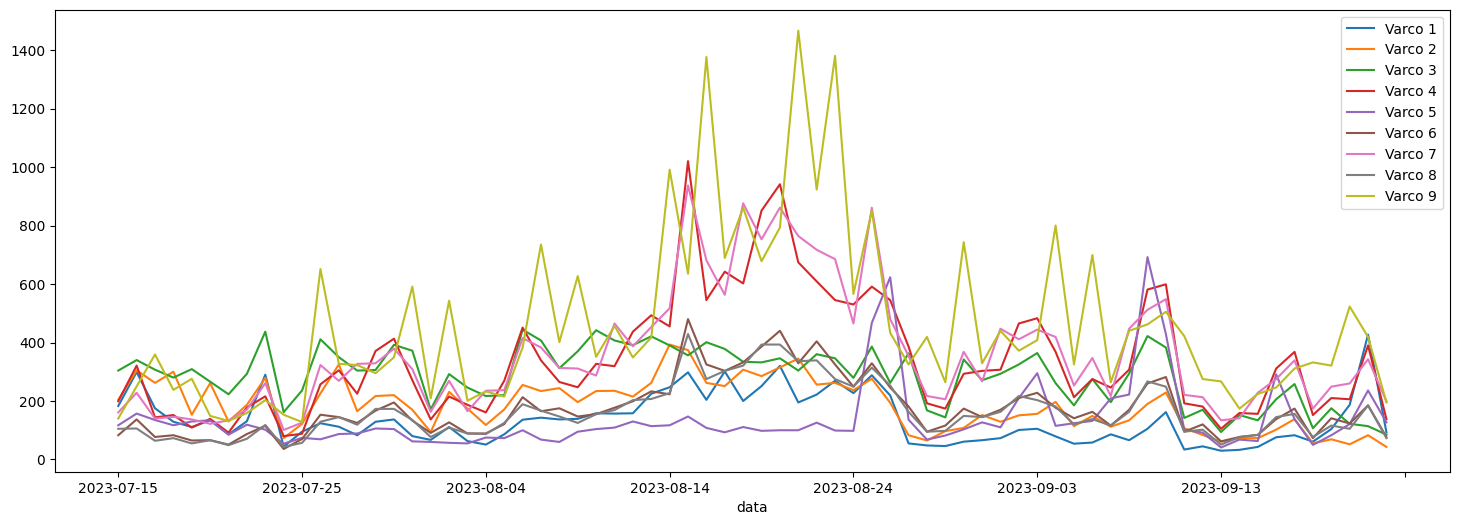

In [53]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18,6))
#contapersone_presenze_df.set_index("data").groupby("varco").plot( figsize=(15, 5), ax=plt.gca())
g_plot = lambda x:x.plot(x = "data", y = "presenze", ax=ax, label=x.name)
contapersone_presenze_df.groupby("varco").apply(g_plot)
plt.show()

## Contamezzi

### Contamezzi descrizione sensore

In [98]:
contamezzi_descrizione_sensore_df = pd.read_parquet("datasets/molveno/contamezzi_descrizione_sensore.parquet")
contamezzi_descrizione_sensore_df

,sensore,direzione,latitudine,longitudine,descrizione_direzione
0,M40,1,46.146086,10.972362,ENTRATA A MOLVENO da Andalo
1,M40,2,46.146086,10.972362,USCITA DA MOLVENO verso Andalo
2,M42,2,46.130443,10.968595,ENTRATA A MOLVENO da S. Lorenzo Dorsino
3,M42,1,46.130443,10.968595,USCITA DA MOLVENO verso S. Lorenzo Dorsino
4,M47,1,46.140916,10.963959,ENTRATA ALLA SPIAGGIA DI MOLVENO
5,M47,2,46.140916,10.963959,USCITA DALLA SPIAGGIA DI MOLVENO


<img src="molveno.png" alt="Alternative text" />

### Contamezzi Molveno

In [99]:
contamezzi_df = pd.read_parquet("datasets/molveno/contamezzi.parquet")
contamezzi_df

,data,sensore,direzione,comune,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato
0,2023-06-29 09:00:00,M40,1,MOLVENO,76,16,1,1,2,0,0,1
1,2023-06-29 09:00:00,M40,2,MOLVENO,53,12,4,0,2,0,0,3
2,2023-06-29 10:00:00,M40,1,MOLVENO,166,44,5,3,4,1,0,2
3,2023-06-29 10:00:00,M40,2,MOLVENO,116,31,5,6,1,0,0,6
4,2023-06-29 11:00:00,M40,1,MOLVENO,147,38,4,8,3,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
13821,2023-10-04 21:00:00,M47,2,MOLVENO,11,0,0,0,0,0,0,0
13822,2023-10-04 22:00:00,M47,1,MOLVENO,1,2,0,0,0,0,0,0
13823,2023-10-04 22:00:00,M47,2,MOLVENO,3,0,0,0,0,0,0,0
13824,2023-10-04 23:00:00,M47,1,MOLVENO,4,1,0,0,0,0,0,0


### Enrich the dataset - split the date and provide total cars

In [100]:
contamezzi_df["data"] = pd.to_datetime(contamezzi_df["data"])
contamezzi_df["day"] = pd.to_datetime(pd.to_datetime(contamezzi_df["data"]).dt.date)
contamezzi_df["hour"] = pd.to_datetime(contamezzi_df["data"]).dt.hour
contamezzi_df = contamezzi_df[
    (contamezzi_df["data"] >= START_DATE) &
    (contamezzi_df["data"] <= END_DATE)
]
contamezzi_df["total_cars"] = contamezzi_df[["cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "nonrilevato"]].sum(axis=1)
contamezzi_df

/tmp/ipykernel_326/2069719814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contamezzi_df["total_cars"] = contamezzi_df[["cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "nonrilevato"]].sum(axis=1)


,data,sensore,direzione,comune,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,day,hour,total_cars
0,2023-06-29 09:00:00,M40,1,MOLVENO,76,16,1,1,2,0,0,1,2023-06-29,9,97
1,2023-06-29 09:00:00,M40,2,MOLVENO,53,12,4,0,2,0,0,3,2023-06-29,9,74
2,2023-06-29 10:00:00,M40,1,MOLVENO,166,44,5,3,4,1,0,2,2023-06-29,10,225
3,2023-06-29 10:00:00,M40,2,MOLVENO,116,31,5,6,1,0,0,6,2023-06-29,10,165
4,2023-06-29 11:00:00,M40,1,MOLVENO,147,38,4,8,3,0,0,4,2023-06-29,11,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13629,2023-09-30 21:00:00,M47,2,MOLVENO,22,2,0,0,0,0,0,0,2023-09-30,21,24
13630,2023-09-30 22:00:00,M47,1,MOLVENO,18,0,0,0,0,0,0,1,2023-09-30,22,19
13631,2023-09-30 22:00:00,M47,2,MOLVENO,26,2,0,0,1,0,0,1,2023-09-30,22,30
13632,2023-09-30 23:00:00,M47,1,MOLVENO,7,1,1,0,0,0,0,0,2023-09-30,23,9


In [101]:
contamezzi_df.dtypes

data           datetime64[ns]
sensore                object
direzione               int64
comune                 object
cl1                     int64
cl2                     int64
cl3                     int64
cl4                     int64
cl5                     int64
cl6                     int64
cl7                     int64
nonrilevato             int64
day            datetime64[ns]
hour                    int32
total_cars              int64
dtype: object

### Example of filtering per specific day

In [102]:
contamezzi_df[(contamezzi_df["day"] >= "2023-06-29") & (contamezzi_df["day"] <= "2023-06-30")]

,data,sensore,direzione,comune,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,day,hour,total_cars
0,2023-06-29 09:00:00,M40,1,MOLVENO,76,16,1,1,2,0,0,1,2023-06-29,9,97
1,2023-06-29 09:00:00,M40,2,MOLVENO,53,12,4,0,2,0,0,3,2023-06-29,9,74
2,2023-06-29 10:00:00,M40,1,MOLVENO,166,44,5,3,4,1,0,2,2023-06-29,10,225
3,2023-06-29 10:00:00,M40,2,MOLVENO,116,31,5,6,1,0,0,6,2023-06-29,10,165
4,2023-06-29 11:00:00,M40,1,MOLVENO,147,38,4,8,3,0,0,4,2023-06-29,11,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9213,2023-06-30 21:00:00,M47,2,MOLVENO,22,2,0,0,0,0,0,0,2023-06-30,21,24
9214,2023-06-30 22:00:00,M47,1,MOLVENO,20,1,1,0,0,0,0,0,2023-06-30,22,22
9215,2023-06-30 22:00:00,M47,2,MOLVENO,20,0,0,0,0,0,0,1,2023-06-30,22,21
9216,2023-06-30 23:00:00,M47,1,MOLVENO,14,2,0,1,0,0,0,1,2023-06-30,23,18


## Summarize the presence of cars

### Entrate da Andalo (sensore M40)

In [103]:
entrata_aldeno = contamezzi_df[(contamezzi_df["sensore"] == "M40") & (contamezzi_df["direzione"] == 1)].groupby("data")[["cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "nonrilevato", "total_cars"]].sum()
entrata_aldeno = entrata_aldeno.reset_index()
entrata_aldeno["day"] = pd.to_datetime(pd.to_datetime(entrata_aldeno["data"]).dt.date)
entrata_aldeno

,data,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars,day
0,2023-06-29 09:00:00,76,16,1,1,2,0,0,1,97,2023-06-29
1,2023-06-29 10:00:00,166,44,5,3,4,1,0,2,225,2023-06-29
2,2023-06-29 11:00:00,147,38,4,8,3,0,0,4,204,2023-06-29
3,2023-06-29 12:00:00,136,34,7,4,1,0,0,5,187,2023-06-29
4,2023-06-29 13:00:00,78,21,7,6,1,1,2,1,117,2023-06-29
...,...,...,...,...,...,...,...,...,...,...,...
2224,2023-09-30 01:00:00,10,2,0,0,0,0,0,0,12,2023-09-30
2225,2023-09-30 02:00:00,3,2,0,0,0,0,0,0,5,2023-09-30
2226,2023-09-30 03:00:00,5,0,0,0,0,0,0,0,5,2023-09-30
2227,2023-09-30 04:00:00,1,1,0,0,0,0,0,0,2,2023-09-30


#### Entrate in un giorno specifico

In [104]:
entrata_aldeno.dtypes

data           datetime64[ns]
cl1                     int64
cl2                     int64
cl3                     int64
cl4                     int64
cl5                     int64
cl6                     int64
cl7                     int64
nonrilevato             int64
total_cars              int64
day            datetime64[ns]
dtype: object

In [105]:
entrata_aldeno[entrata_aldeno["day"] == SPECIFIC_DAY]

,data,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars,day
0,2023-06-29 09:00:00,76,16,1,1,2,0,0,1,97,2023-06-29
1,2023-06-29 10:00:00,166,44,5,3,4,1,0,2,225,2023-06-29
2,2023-06-29 11:00:00,147,38,4,8,3,0,0,4,204,2023-06-29
3,2023-06-29 12:00:00,136,34,7,4,1,0,0,5,187,2023-06-29
4,2023-06-29 13:00:00,78,21,7,6,1,1,2,1,117,2023-06-29
5,2023-06-29 14:00:00,126,28,7,5,2,0,0,6,174,2023-06-29
6,2023-06-29 15:00:00,115,32,9,3,2,1,0,4,166,2023-06-29
7,2023-06-29 16:00:00,122,33,14,6,0,1,0,4,180,2023-06-29
8,2023-06-29 17:00:00,129,41,11,3,3,0,0,2,189,2023-06-29
9,2023-06-29 18:00:00,133,28,4,7,1,0,0,1,174,2023-06-29


<Axes: xlabel='data'>

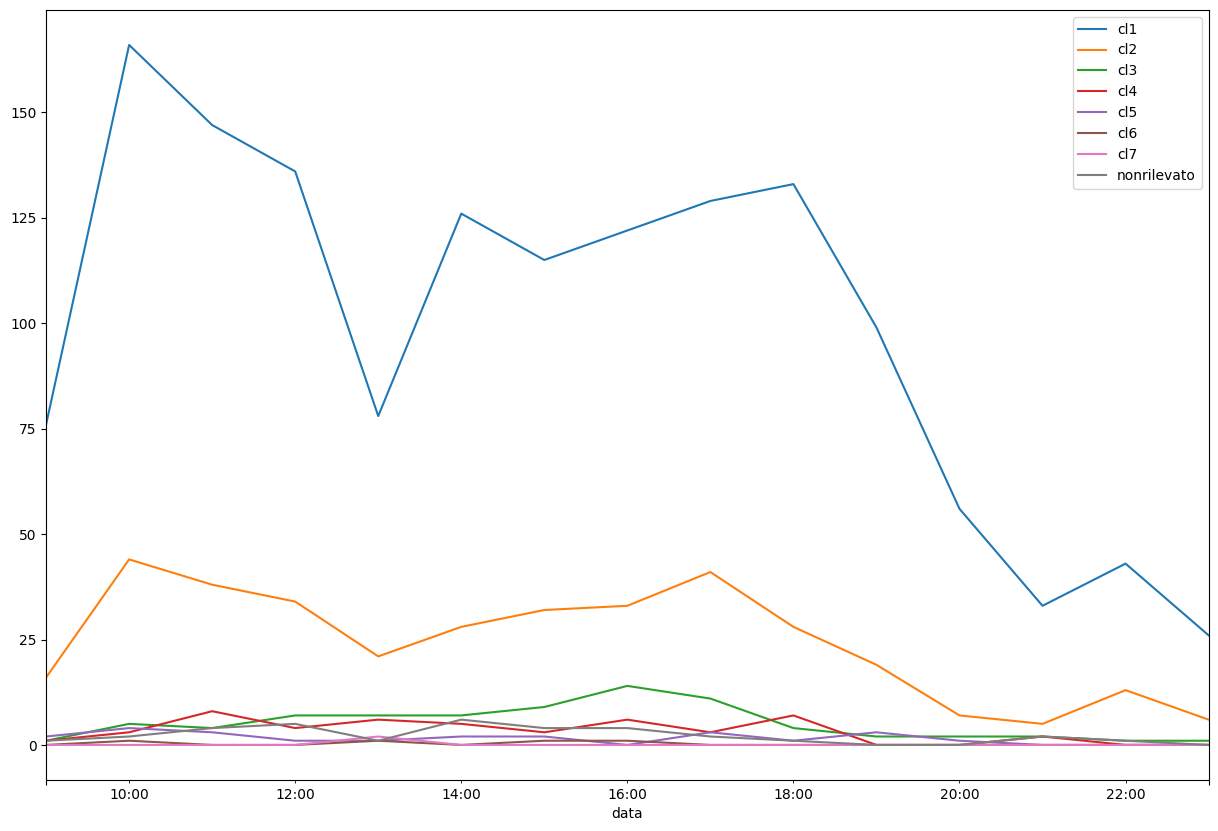

In [106]:
entrata_aldeno[entrata_aldeno["day"] == "2023-06-29"][["data", "cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "nonrilevato"]].plot(x="data", figsize=(15, 10))

### Uscite da Andalo (sensore M40)

In [107]:
uscita_aldeno = contamezzi_df[(contamezzi_df["sensore"] == "M40") & (contamezzi_df["direzione"] == 2)].groupby("data")[["cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "nonrilevato", "total_cars"]].sum()
uscita_aldeno = uscita_aldeno.reset_index()
uscita_aldeno["day"] = pd.to_datetime(pd.to_datetime(uscita_aldeno["data"]).dt.date)
uscita_aldeno

,data,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars,day
0,2023-06-29 09:00:00,53,12,4,0,2,0,0,3,74,2023-06-29
1,2023-06-29 10:00:00,116,31,5,6,1,0,0,6,165,2023-06-29
2,2023-06-29 11:00:00,109,22,7,2,2,0,0,4,146,2023-06-29
3,2023-06-29 12:00:00,98,19,8,1,5,1,0,0,132,2023-06-29
4,2023-06-29 13:00:00,91,11,2,2,0,1,0,1,108,2023-06-29
...,...,...,...,...,...,...,...,...,...,...,...
2224,2023-09-30 01:00:00,2,0,0,0,0,0,0,0,2,2023-09-30
2225,2023-09-30 02:00:00,1,0,0,0,0,0,0,0,1,2023-09-30
2226,2023-09-30 03:00:00,0,1,0,0,0,0,0,0,1,2023-09-30
2227,2023-09-30 04:00:00,2,0,0,0,0,0,0,0,2,2023-09-30


#### Uscite in un giorno specifico

In [108]:
uscita_aldeno[uscita_aldeno["day"] == SPECIFIC_DAY]

,data,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars,day
0,2023-06-29 09:00:00,53,12,4,0,2,0,0,3,74,2023-06-29
1,2023-06-29 10:00:00,116,31,5,6,1,0,0,6,165,2023-06-29
2,2023-06-29 11:00:00,109,22,7,2,2,0,0,4,146,2023-06-29
3,2023-06-29 12:00:00,98,19,8,1,5,1,0,0,132,2023-06-29
4,2023-06-29 13:00:00,91,11,2,2,0,1,0,1,108,2023-06-29
5,2023-06-29 14:00:00,110,16,2,4,6,0,0,2,140,2023-06-29
6,2023-06-29 15:00:00,123,12,6,2,1,0,0,4,148,2023-06-29
7,2023-06-29 16:00:00,142,14,7,2,2,0,0,3,170,2023-06-29
8,2023-06-29 17:00:00,144,23,7,2,3,0,0,2,181,2023-06-29
9,2023-06-29 18:00:00,118,14,2,3,7,0,0,2,146,2023-06-29


<Axes: xlabel='data'>

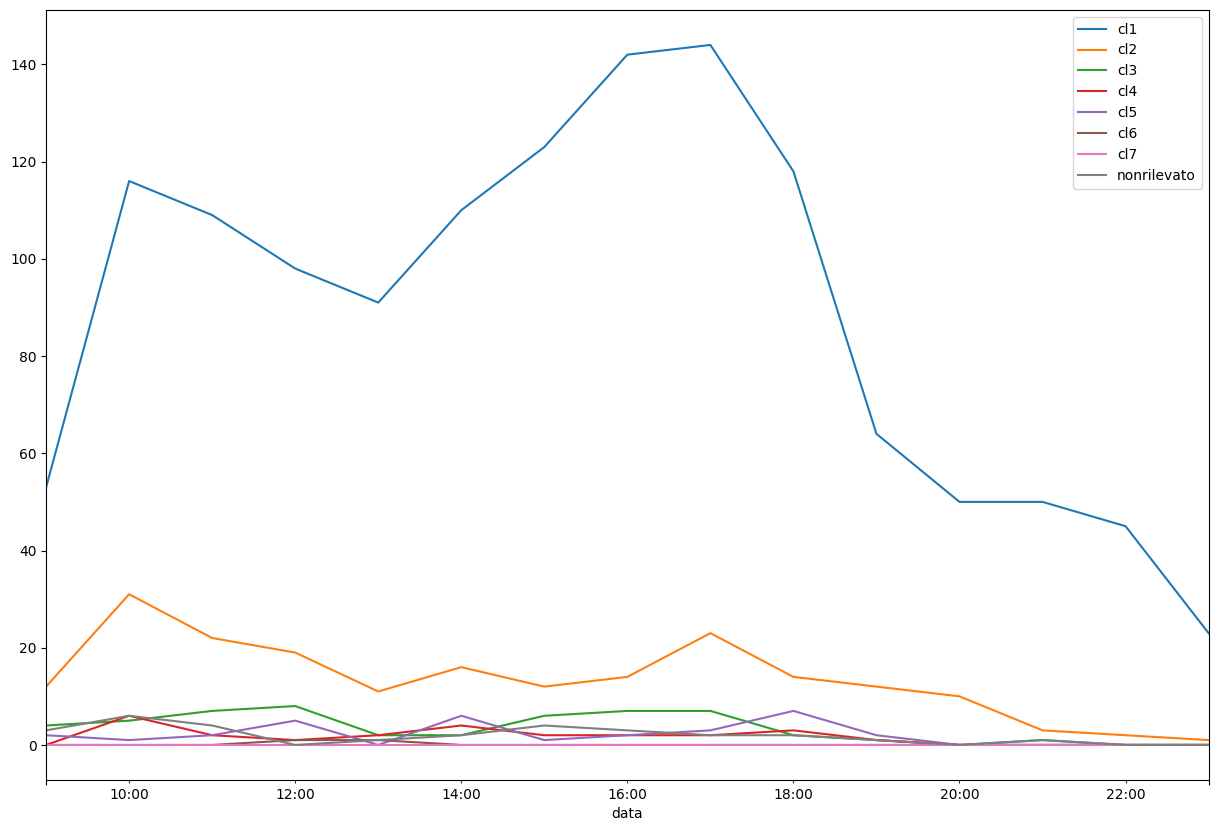

In [109]:
uscita_aldeno[uscita_aldeno["day"] == SPECIFIC_DAY][["data", "cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "nonrilevato"]].plot(x="data", figsize=(15, 10))

### Find the differences of entry/exit from Andalo

In [110]:
diff_aldeno_df = entrata_aldeno.merge(uscita_aldeno, on="data", suffixes=["_entrata_aldeno", "_uscita_aldeno"])
diff_aldeno_df["difference_total_cars_aldeno"] = diff_aldeno_df["total_cars_entrata_aldeno"] - diff_aldeno_df["total_cars_uscita_aldeno"]
diff_aldeno_df["difference_cl1_aldeno"] = diff_aldeno_df["cl1_entrata_aldeno"] - diff_aldeno_df["cl1_uscita_aldeno"]
diff_aldeno_df["difference_cl2_aldeno"] = diff_aldeno_df["cl2_entrata_aldeno"] - diff_aldeno_df["cl2_uscita_aldeno"]
diff_aldeno_df["difference_cl3_aldeno"] = diff_aldeno_df["cl3_entrata_aldeno"] - diff_aldeno_df["cl3_uscita_aldeno"]
diff_aldeno_df["difference_cl4_aldeno"] = diff_aldeno_df["cl4_entrata_aldeno"] - diff_aldeno_df["cl4_uscita_aldeno"]
diff_aldeno_df["difference_cl5_aldeno"] = diff_aldeno_df["cl5_entrata_aldeno"] - diff_aldeno_df["cl5_uscita_aldeno"]
diff_aldeno_df = diff_aldeno_df[["data", "difference_total_cars_aldeno", 
                                 "difference_cl1_aldeno", "difference_cl2_aldeno", "difference_cl3_aldeno", 
                                 "difference_cl4_aldeno", "difference_cl5_aldeno"]]
diff_aldeno_df["day"] = pd.to_datetime(pd.to_datetime(diff_aldeno_df["data"]).dt.date)
diff_aldeno_df

,data,difference_total_cars_aldeno,difference_cl1_aldeno,difference_cl2_aldeno,difference_cl3_aldeno,difference_cl4_aldeno,difference_cl5_aldeno,day
0,2023-06-29 09:00:00,23,23,4,-3,1,0,2023-06-29
1,2023-06-29 10:00:00,60,50,13,0,-3,3,2023-06-29
2,2023-06-29 11:00:00,58,38,16,-3,6,1,2023-06-29
3,2023-06-29 12:00:00,55,38,15,-1,3,-4,2023-06-29
4,2023-06-29 13:00:00,9,-13,10,5,4,1,2023-06-29
...,...,...,...,...,...,...,...,...
2224,2023-09-30 01:00:00,10,8,2,0,0,0,2023-09-30
2225,2023-09-30 02:00:00,4,2,2,0,0,0,2023-09-30
2226,2023-09-30 03:00:00,4,5,-1,0,0,0,2023-09-30
2227,2023-09-30 04:00:00,0,-1,1,0,0,0,2023-09-30


#### Total cars inside Molveno in one specific day (Based only on Andalo Sensors)

<Axes: xlabel='data'>

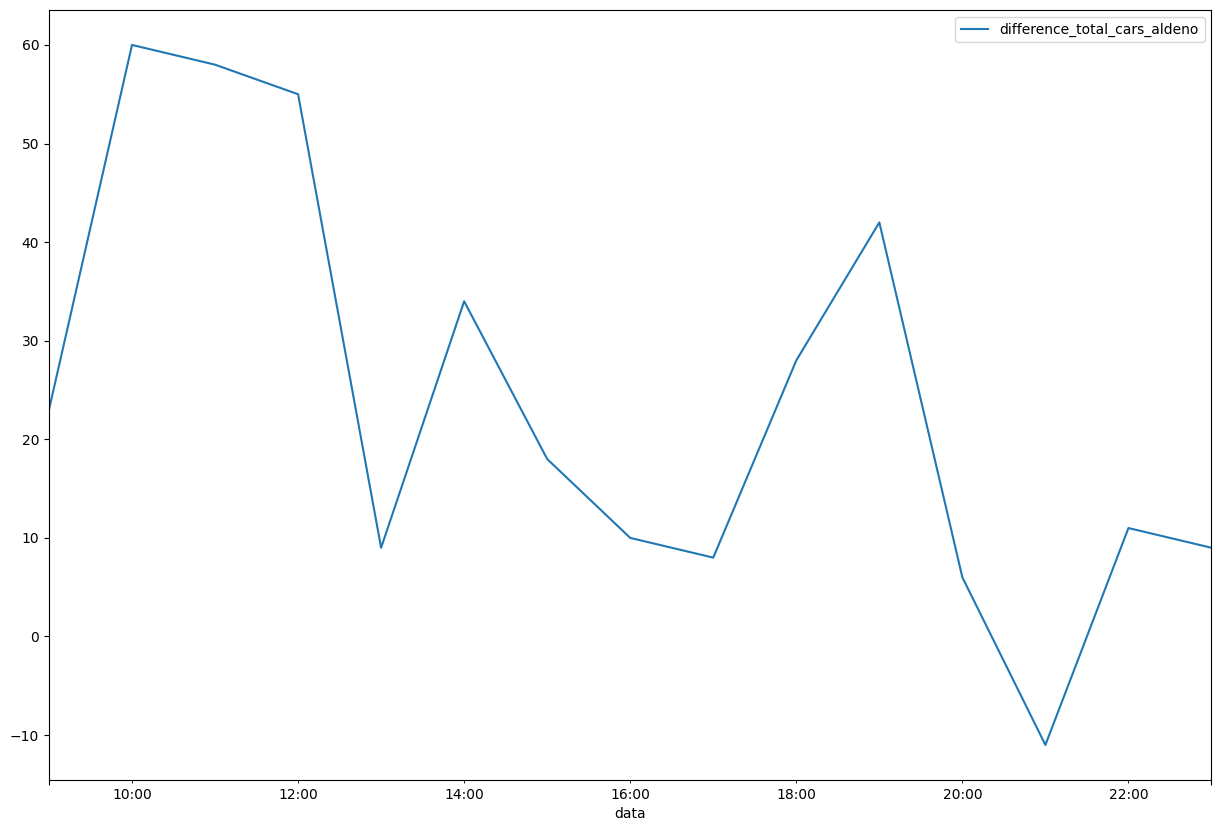

In [111]:
diff_aldeno_df[diff_aldeno_df["day"] == SPECIFIC_DAY][["data", "difference_total_cars_aldeno"]].plot(x="data", figsize=(15, 10))

### Entrate da  Dorsino (sensore M42)

In [112]:
entrata_dorsino = contamezzi_df[(contamezzi_df["sensore"] == "M42") & (contamezzi_df["direzione"] == 2)].groupby("data")[["cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "nonrilevato", "total_cars"]].sum()
entrata_dorsino = entrata_dorsino.reset_index()
entrata_dorsino["day"] = pd.to_datetime(pd.to_datetime(entrata_dorsino["data"]).dt.date)
entrata_dorsino

,data,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars,day
0,2023-06-29 10:00:00,32,5,0,0,0,0,0,0,37,2023-06-29
1,2023-06-29 11:00:00,63,5,1,0,1,0,1,1,72,2023-06-29
2,2023-06-29 12:00:00,42,11,0,0,0,0,0,0,53,2023-06-29
3,2023-06-29 13:00:00,44,4,2,0,2,0,0,2,54,2023-06-29
4,2023-06-29 14:00:00,55,8,0,1,0,0,0,1,65,2023-06-29
...,...,...,...,...,...,...,...,...,...,...,...
2241,2023-09-30 19:00:00,22,4,2,0,0,0,0,0,28,2023-09-30
2242,2023-09-30 20:00:00,14,0,1,0,0,0,0,0,15,2023-09-30
2243,2023-09-30 21:00:00,14,1,0,0,0,0,0,0,15,2023-09-30
2244,2023-09-30 22:00:00,11,1,0,0,0,0,0,0,12,2023-09-30


### Uscite da Dorsino

In [113]:
uscita_dorsino = contamezzi_df[(contamezzi_df["sensore"] == "M42") & (contamezzi_df["direzione"] == 1)].groupby("data")[["cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "nonrilevato", "total_cars"]].sum()
uscita_dorsino = uscita_dorsino.reset_index()
uscita_dorsino["day"] = pd.to_datetime(pd.to_datetime(uscita_dorsino["data"]).dt.date)
uscita_dorsino

,data,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars,day
0,2023-06-29 10:00:00,27,5,0,2,0,0,0,2,36,2023-06-29
1,2023-06-29 11:00:00,44,8,4,4,1,0,0,7,68,2023-06-29
2,2023-06-29 12:00:00,52,9,2,3,0,0,0,4,70,2023-06-29
3,2023-06-29 13:00:00,37,6,1,2,0,0,0,2,48,2023-06-29
4,2023-06-29 14:00:00,60,11,2,0,0,0,0,3,76,2023-06-29
...,...,...,...,...,...,...,...,...,...,...,...
2241,2023-09-30 19:00:00,43,7,2,2,1,0,0,4,59,2023-09-30
2242,2023-09-30 20:00:00,25,1,1,0,0,0,0,2,29,2023-09-30
2243,2023-09-30 21:00:00,28,2,0,0,0,0,0,1,31,2023-09-30
2244,2023-09-30 22:00:00,23,2,3,0,0,0,0,2,30,2023-09-30


### Find the differences of entry/exit from Dorsino

In [114]:
diff_dorsino_df = entrata_dorsino.merge(uscita_dorsino, on="data", suffixes=["_entrata_dorsino", "_uscita_dorsino"])
diff_dorsino_df["difference_total_cars_dorsino"] = diff_dorsino_df["total_cars_entrata_dorsino"] - diff_dorsino_df["total_cars_uscita_dorsino"]
diff_dorsino_df["difference_cl1_dorsino"] = diff_dorsino_df["cl1_entrata_dorsino"] - diff_dorsino_df["cl1_uscita_dorsino"]
diff_dorsino_df["difference_cl2_dorsino"] = diff_dorsino_df["cl2_entrata_dorsino"] - diff_dorsino_df["cl2_uscita_dorsino"]
diff_dorsino_df["difference_cl3_dorsino"] = diff_dorsino_df["cl3_entrata_dorsino"] - diff_dorsino_df["cl3_uscita_dorsino"]
diff_dorsino_df["difference_cl4_dorsino"] = diff_dorsino_df["cl4_entrata_dorsino"] - diff_dorsino_df["cl4_uscita_dorsino"]
diff_dorsino_df["difference_cl5_dorsino"] = diff_dorsino_df["cl5_entrata_dorsino"] - diff_dorsino_df["cl5_uscita_dorsino"]
diff_dorsino_df = diff_dorsino_df[["data", "difference_total_cars_dorsino", 
                                 "difference_cl1_dorsino", "difference_cl2_dorsino", "difference_cl3_dorsino", 
                                 "difference_cl4_dorsino", "difference_cl5_dorsino"]]
diff_dorsino_df["day"] = pd.to_datetime(pd.to_datetime(diff_dorsino_df["data"]).dt.date)
diff_dorsino_df

,data,difference_total_cars_dorsino,difference_cl1_dorsino,difference_cl2_dorsino,difference_cl3_dorsino,difference_cl4_dorsino,difference_cl5_dorsino,day
0,2023-06-29 10:00:00,1,5,0,0,-2,0,2023-06-29
1,2023-06-29 11:00:00,4,19,-3,-3,-4,0,2023-06-29
2,2023-06-29 12:00:00,-17,-10,2,-2,-3,0,2023-06-29
3,2023-06-29 13:00:00,6,7,-2,1,-2,2,2023-06-29
4,2023-06-29 14:00:00,-11,-5,-3,-2,1,0,2023-06-29
...,...,...,...,...,...,...,...,...
2241,2023-09-30 19:00:00,-31,-21,-3,0,-2,-1,2023-09-30
2242,2023-09-30 20:00:00,-14,-11,-1,0,0,0,2023-09-30
2243,2023-09-30 21:00:00,-16,-14,-1,0,0,0,2023-09-30
2244,2023-09-30 22:00:00,-18,-12,-1,-3,0,0,2023-09-30


#### Total cars inside Molveno in one specific day (Based only on Dorsino Sensors)

<Axes: xlabel='data'>

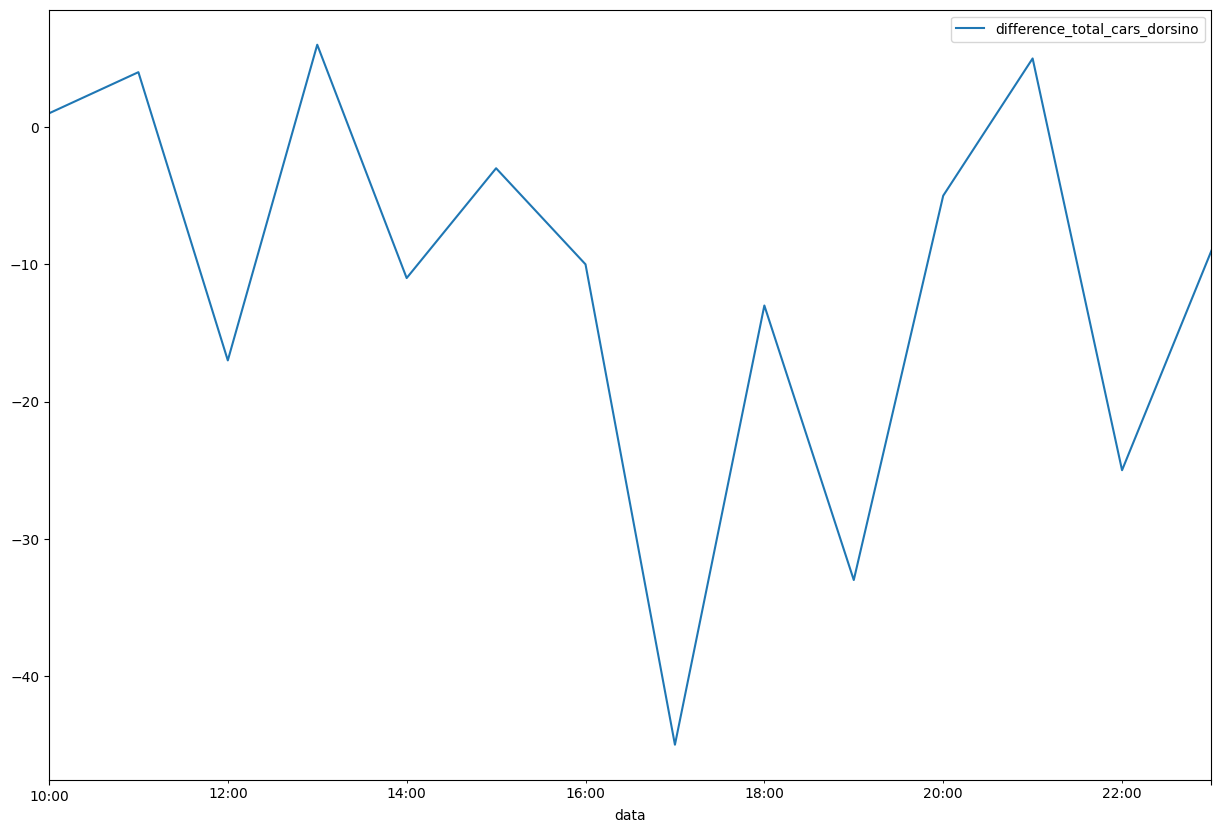

In [115]:
diff_dorsino_df[diff_dorsino_df["day"] == SPECIFIC_DAY][["data", "difference_total_cars_dorsino"]].plot(x="data", figsize=(15, 10))

### Notes

- The results indicate that Dorsino sensors detect more car exits than entries.
- The primary entry point for cars is Andalo

### Find the cars present in Molveno by summing up the data from Andalo and Dorsino sensors

In [116]:
present_cars_molveno = diff_dorsino_df.merge(diff_aldeno_df, on="data", suffixes=["_dorsino", "_aldeno"])
present_cars_molveno

,data,difference_total_cars_dorsino,difference_cl1_dorsino,difference_cl2_dorsino,difference_cl3_dorsino,difference_cl4_dorsino,difference_cl5_dorsino,day_dorsino,difference_total_cars_aldeno,difference_cl1_aldeno,difference_cl2_aldeno,difference_cl3_aldeno,difference_cl4_aldeno,difference_cl5_aldeno,day_aldeno
0,2023-06-29 10:00:00,1,5,0,0,-2,0,2023-06-29,60,50,13,0,-3,3,2023-06-29
1,2023-06-29 11:00:00,4,19,-3,-3,-4,0,2023-06-29,58,38,16,-3,6,1,2023-06-29
2,2023-06-29 12:00:00,-17,-10,2,-2,-3,0,2023-06-29,55,38,15,-1,3,-4,2023-06-29
3,2023-06-29 13:00:00,6,7,-2,1,-2,2,2023-06-29,9,-13,10,5,4,1,2023-06-29
4,2023-06-29 14:00:00,-11,-5,-3,-2,1,0,2023-06-29,34,16,12,5,1,-4,2023-06-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2223,2023-09-30 01:00:00,2,2,0,0,0,0,2023-09-30,10,8,2,0,0,0,2023-09-30
2224,2023-09-30 02:00:00,0,0,0,0,0,0,2023-09-30,4,2,2,0,0,0,2023-09-30
2225,2023-09-30 03:00:00,0,-1,1,0,0,0,2023-09-30,4,5,-1,0,0,0,2023-09-30
2226,2023-09-30 04:00:00,-2,-2,0,0,0,0,2023-09-30,0,-1,1,0,0,0,2023-09-30


In [117]:
present_cars_molveno["total_cars"] = diff_dorsino_df["difference_total_cars_dorsino"] + diff_aldeno_df["difference_total_cars_aldeno"]
present_cars_molveno = present_cars_molveno[["data", "day_dorsino", "total_cars"]]
present_cars_molveno["total_cars"] = present_cars_molveno["total_cars"].astype(int)
present_cars_molveno = present_cars_molveno.rename(columns={"day_dorsino": "day"})
present_cars_molveno

/tmp/ipykernel_326/763305533.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  present_cars_molveno["total_cars"] = present_cars_molveno["total_cars"].astype(int)


,data,day,total_cars
0,2023-06-29 10:00:00,2023-06-29,24
1,2023-06-29 11:00:00,2023-06-29,64
2,2023-06-29 12:00:00,2023-06-29,41
3,2023-06-29 13:00:00,2023-06-29,61
4,2023-06-29 14:00:00,2023-06-29,-2
...,...,...,...
2223,2023-09-30 01:00:00,2023-09-30,8
2224,2023-09-30 02:00:00,2023-09-30,10
2225,2023-09-30 03:00:00,2023-09-30,4
2226,2023-09-30 04:00:00,2023-09-30,2


#### Visualize cars present in Molveno in one specific day 

In [118]:
specific_day = present_cars_molveno[
    (present_cars_molveno["day"] == "2023-08-03")]
specific_day

,data,day,total_cars
830,2023-08-03 00:00:00,2023-08-03,8
831,2023-08-03 01:00:00,2023-08-03,-2
832,2023-08-03 02:00:00,2023-08-03,-3
833,2023-08-03 03:00:00,2023-08-03,6
834,2023-08-03 04:00:00,2023-08-03,2
835,2023-08-03 05:00:00,2023-08-03,-7
836,2023-08-03 06:00:00,2023-08-03,19
837,2023-08-03 07:00:00,2023-08-03,26
838,2023-08-03 08:00:00,2023-08-03,-21
839,2023-08-03 09:00:00,2023-08-03,-70


<Axes: xlabel='data'>

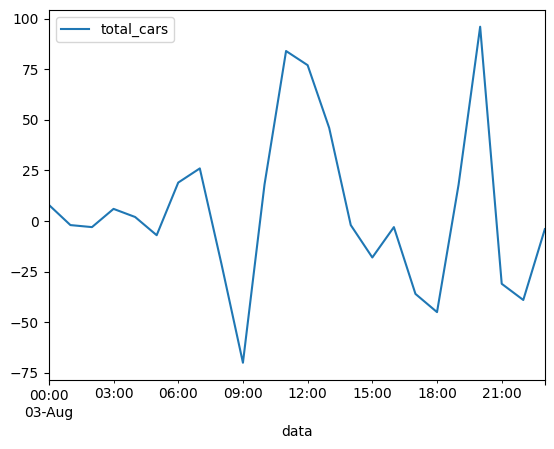

In [119]:
specific_day.plot(x="data", y="total_cars")

# Movimento turistico

In [80]:
movimento_turistico = pd.read_parquet("datasets/movimento_turistico/movimento_turistico.parquet")
movimento_turistico

,giorno,ente_promozione,arrivi,presenze
2,2022-01-01,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",1191,9433
3,2022-01-02,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",5381,8585
4,2022-01-03,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",1619,8712
5,2022-01-04,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",847,8534
6,2022-01-05,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",1297,8464
...,...,...,...,...
727,2023-12-27,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",2537,8765
728,2023-12-28,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",1604,9418
729,2023-12-29,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",1904,9996
730,2023-12-30,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",2911,10525


In [121]:
movimento_turistico_timeframe = movimento_turistico[
    (movimento_turistico["giorno"] >= START_DATE) &
    (movimento_turistico["giorno"] <= END_DATE)
]
movimento_turistico_timeframe

,giorno,ente_promozione,arrivi,presenze
518,2023-06-01,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",1805,2984
519,2023-06-02,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",2219,4772
520,2023-06-03,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",859,4694
521,2023-06-04,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",830,2059
522,2023-06-05,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",687,2114
...,...,...,...,...
635,2023-09-26,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",609,2138
636,2023-09-27,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",389,1982
637,2023-09-28,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",589,1974
638,2023-09-29,"ALTOPIANO DELLA PAGANELLA, PIANA DELLA ROTALIA...",1215,2545


<Axes: xlabel='giorno'>

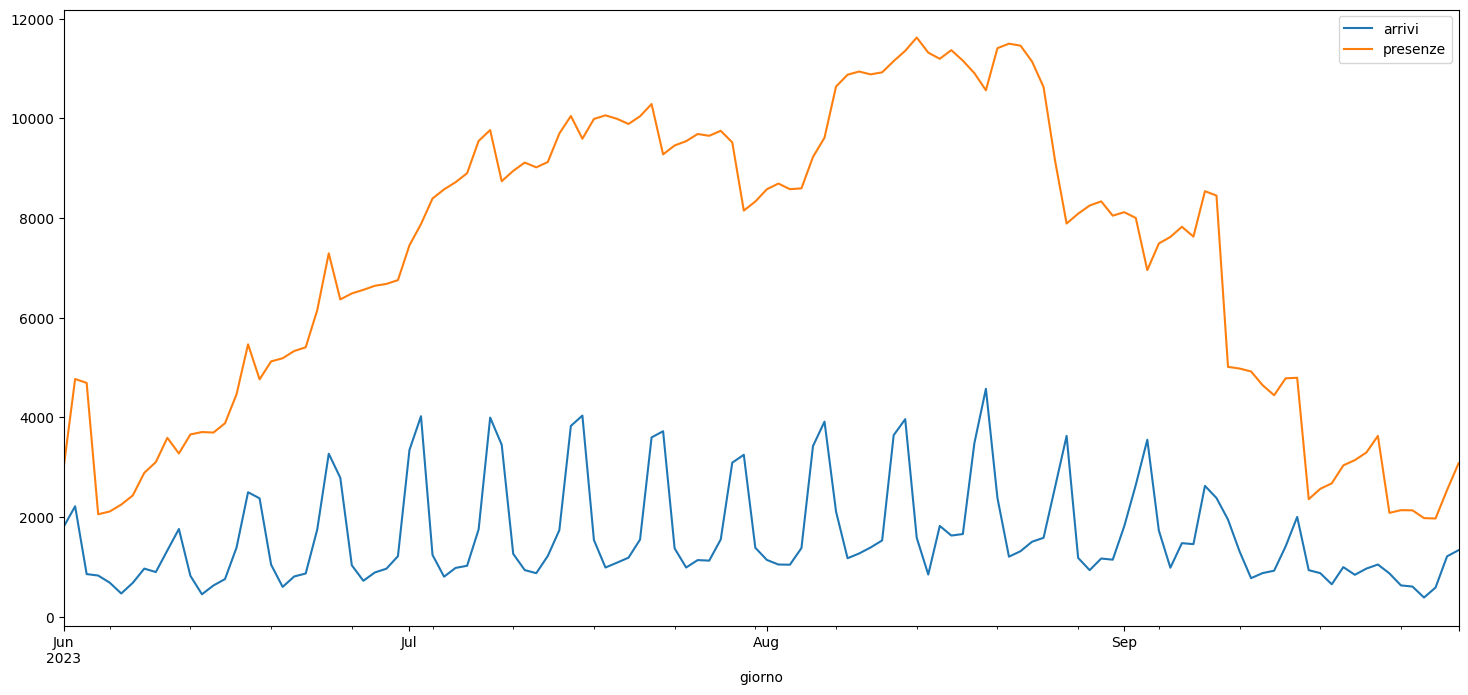

In [123]:
movimento_turistico_timeframe.plot(x="giorno", y=["arrivi", "presenze"], figsize=(18, 8))